# G2M insight for Cab Investment firm

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import DataSets

In [2]:
cab_df = pd.read_csv('DataSets/Cab_Data.csv')
city_df = pd.read_csv('DataSets/City.csv')
cust_df = pd.read_csv('DataSets/Customer_ID.csv')
tran_df = pd.read_csv('DataSets/Transaction_ID.csv')

##### 1- cad_df: this data includes details of transaction for 2 cab companies
* ######  view the fields' names and take a glance at the data in the set



In [3]:
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


first observation: the date format is wrong.
After research the date should be formatted to YYYY-MM-DD

In [4]:
cab_df.sort_values(by=['KM Travelled'])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
301382,10370047,43344,Yellow Cab,SAN DIEGO CA,1.9,30.90,26.904
231134,10282539,43092,Yellow Cab,NEW YORK NY,1.9,46.44,23.940
28417,10036034,42518,Pink Cab,CHICAGO IL,1.9,22.30,22.040
196925,10242066,43028,Pink Cab,SILICON VALLEY,1.9,27.06,22.800
231057,10282462,43089,Yellow Cab,NEW YORK NY,1.9,50.62,25.080
...,...,...,...,...,...,...,...
194768,10239225,43016,Yellow Cab,MIAMI FL,48.0,978.68,650.880
257515,10315682,43187,Yellow Cab,WASHINGTON DC,48.0,709.47,662.400
131268,10161496,42827,Yellow Cab,LOS ANGELES CA,48.0,1096.57,685.440
356033,10435572,43464,Yellow Cab,NEW YORK NY,48.0,1214.12,645.120


In [5]:
price = cab_df['Price Charged'].mean()
print(round(price, 3))

423.443


It's not a valueable info since prices depend on km traveled

In [6]:
cost = cab_df['Cost of Trip'].mean()
print(round(cost, 3))

286.19


In [7]:
range_of_price = cab_df['Price Charged'] - cab_df['Cost of Trip']

In [8]:
cab_df['Profit'] = range_of_price

In [9]:
cab_df.sort_values(by=['KM Travelled'])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
301382,10370047,43344,Yellow Cab,SAN DIEGO CA,1.9,30.90,26.904,3.996
231134,10282539,43092,Yellow Cab,NEW YORK NY,1.9,46.44,23.940,22.500
28417,10036034,42518,Pink Cab,CHICAGO IL,1.9,22.30,22.040,0.260
196925,10242066,43028,Pink Cab,SILICON VALLEY,1.9,27.06,22.800,4.260
231057,10282462,43089,Yellow Cab,NEW YORK NY,1.9,50.62,25.080,25.540
...,...,...,...,...,...,...,...,...
194768,10239225,43016,Yellow Cab,MIAMI FL,48.0,978.68,650.880,327.800
257515,10315682,43187,Yellow Cab,WASHINGTON DC,48.0,709.47,662.400,47.070
131268,10161496,42827,Yellow Cab,LOS ANGELES CA,48.0,1096.57,685.440,411.130
356033,10435572,43464,Yellow Cab,NEW YORK NY,48.0,1214.12,645.120,569.000


In [10]:
print(cab_df['Price Charged'].mean() - cab_df['Cost of Trip'].mean())

137.2531984345942


In [11]:
cab_df['Price Charged'].mode()

0    191.27
1    298.32
dtype: float64

In [12]:
cab_df['Cost of Trip'].mode()

0    362.88
dtype: float64

In [13]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Profit            0
dtype: int64

##### 2- city_df: this file contains list of US cities, their population and number of cab users

In [14]:
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [15]:
print("Number of rows: ", city_df.shape[0])
print("Number of columns: ", city_df.shape[1])

Number of rows:  20
Number of columns:  3


In [16]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,CHICAGO IL,"631,442","80,021"
freq,1,1,1


In [17]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

##### 3- cust_df: this is a mapping table that contains a unique identifier which links the customer’s demographic details

In [18]:
cust_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [19]:
cust = cust_df.drop(columns=['Customer ID', 'Age', 'Gender'])

In [20]:
cust.describe()

,Income (USD/Month)
count,49171.000000
mean,15015.631856
std,8002.208253
min,2000.000000
25%,8289.500000
50%,14656.000000
75%,21035.000000
max,35000.000000


In [21]:
cust_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

##### 4-tran_df: this is a mapping table that contains transaction to customer mapping and payment mode

In [22]:
tran_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [23]:
tran_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [24]:
repeated_cust=tran_df['Customer ID'].unique()

In [25]:
print(repeated_cust)

[29290 27703 28712 ... 41414 41677 39761]


In [26]:
tran_df[tran_df['Customer ID'].duplicated() == False]

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
439788,10439799,12490,Cash
439809,10439820,14971,Card
439827,10439838,41414,Card
439829,10439840,41677,Cash


In [27]:
# Select duplicate rows except first occurrence based on all columns
repeat_cust = tran_df[tran_df['Customer ID'].duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(repeat_cust)

Duplicate Rows except first occurrence based on all columns are :
        Transaction ID  Customer ID Payment_Mode
35            10000046         5734         Cash
85            10000096         8927         Cash
253           10000264        43331         Cash
268           10000279        43708         Cash
308           10000319        43151         Cash
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[390927 rows x 3 columns]


In [28]:
repeat_cust

,Transaction ID,Customer ID,Payment_Mode
35,10000046,5734,Cash
85,10000096,8927,Cash
253,10000264,43331,Cash
268,10000279,43708,Cash
308,10000319,43151,Cash
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


## Merging DataSets

As quick reminder of the columns' names

In [29]:
cab_df.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315


In [30]:
city_df.head(1)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"


In [31]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [32]:
cust_df.head(1)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


In [33]:
tran_df.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


* Merge transaction dataframe (tran_df) and Customer dataframe (cust_df) on Customer ID

In [34]:
tran_df.shape

(440098, 3)

In [35]:
cust_df.shape

(49171, 4)

In [36]:
full_cust = pd.merge(cust_df, tran_df, on=["Customer ID"])

In [37]:
full_cust

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


* Merge cab dataframe (cab_df) and city dataframe (city_df) on City

In [38]:
full_city = pd.merge(cab_df, city_df, on=["City"])

In [39]:
full_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001"


* Finally merge full_city dataframe and full_cust dataframe on Transaction ID

In [40]:
final_df = pd.merge(full_city, full_cust, on=["Transaction ID"])

In [41]:
final_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175,Male,32,6423,Card


## Cleaning DataSet

* Convert date format Ordinal to yyyy-mm-dd format

In [42]:
from datetime import date, timedelta
final_df["Date of Travel"] = final_df["Date of Travel"].apply(lambda x: date(1900,1,1) + timedelta(x))
#conversion by jimmygjean

In [43]:
final_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392,Male,24,15651,Cash
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286,Male,32,6528,Cash
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265,Male,56,7966,Cash
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175,Male,32,6423,Card


In [44]:
#number of pink cabs
final_df.query('Company == "Pink Cab"').Company.count()

84711

In [45]:
#number of yellow cabs
final_df.query('Company == "Yellow Cab"').Company.count()

274681

In [46]:
months=[]
years =[]
for i in range(len(final_df['Date of Travel'])):
    months.append(final_df['Date of Travel'][i].month)
    years.append(final_df['Date of Travel'][i].year)
final_df['Month'] = months
final_df['Year'] = years

final_df.drop('Date of Travel', axis=1, inplace=True)

In [47]:
final_df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290,Male,28,10813,Card,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703,Male,27,9237,Card,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712,Male,53,11242,Cash,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020,Male,23,23327,Cash,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182,Male,33,8536,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392,Male,24,15651,Cash,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286,Male,32,6528,Cash,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265,Male,56,7966,Cash,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175,Male,32,6423,Card,1,2018


In [48]:
# Select duplicate rows except first occurrence based on all columns
repeated_cust = final_df[final_df['Customer ID'].duplicated()]
# print("Duplicate Rows except first occurrence based on all columns are :")


In [49]:
repeated_cust

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
90,10004546,Yellow Cab,ATLANTA GA,9.60,192.11,115.2000,76.9100,"814,885","24,701",27631,Male,37,18163,Cash,1,2016
127,10007260,Pink Cab,ATLANTA GA,27.44,380.45,293.6080,86.8420,"814,885","24,701",27884,Male,32,13505,Cash,2,2016
186,10011294,Yellow Cab,ATLANTA GA,18.43,434.92,245.4876,189.4324,"814,885","24,701",27884,Male,32,13505,Card,2,2016
187,10011295,Yellow Cab,ATLANTA GA,22.00,502.60,314.1600,188.4400,"814,885","24,701",28572,Female,30,22186,Card,2,2016
218,10013046,Yellow Cab,ATLANTA GA,7.00,170.55,99.1200,71.4300,"814,885","24,701",27631,Male,37,18163,Cash,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392,Male,24,15651,Cash,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286,Male,32,6528,Cash,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265,Male,56,7966,Cash,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175,Male,32,6423,Card,1,2018


In [50]:
one_time_cust = final_df[final_df['Customer ID'].duplicated()== False]

In [51]:
one_time_cust
# one_time_cust['Customer ID'].value_counts()
# num_rows = one_time_cust['Customer ID'].shape[0]

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290,Male,28,10813,Card,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703,Male,27,9237,Card,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712,Male,53,11242,Cash,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020,Male,23,23327,Cash,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182,Male,33,8536,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336093,10197277,Pink Cab,WASHINGTON DC,32.64,375.27,368.8320,6.4380,"418,859","127,001",51510,Female,18,6855,Card,7,2017
336284,10199158,Yellow Cab,WASHINGTON DC,2.02,26.13,24.9672,1.1628,"418,859","127,001",52759,Female,58,2615,Card,7,2017
336392,10201973,Yellow Cab,WASHINGTON DC,17.25,225.16,215.2800,9.8800,"418,859","127,001",51078,Male,21,8810,Card,8,2017
343083,10274704,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,67.3860,"418,859","127,001",52614,Female,44,8303,Card,12,2017


In [52]:
# num_rows

In [53]:
final_df['Population'] = (
    final_df['Population'].str.replace(',', '', regex=True).astype(float)
)
final_df['Users'] = (
    final_df['Users'].str.replace(',', '', regex=True).astype(float)
)

In [54]:
final_df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,814885.0,24701.0,29290,Male,28,10813,Card,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,814885.0,24701.0,27703,Male,27,9237,Card,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,814885.0,24701.0,28712,Male,53,11242,Cash,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,814885.0,24701.0,28020,Male,23,23327,Cash,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,814885.0,24701.0,27182,Male,33,8536,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,52392,Male,24,15651,Cash,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,53286,Male,32,6528,Cash,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,52265,Male,56,7966,Cash,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,52175,Male,32,6423,Card,1,2018


## Visualisation

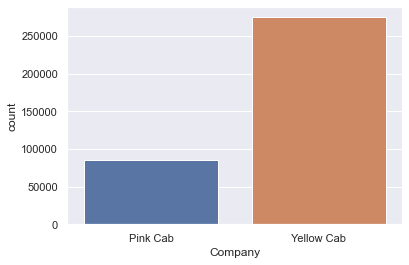

In [55]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Company", data=final_df)

* Overall, the yellow cab is used more than the pink cab

In [56]:
grouped = final_df.groupby(final_df.Company)
PinkCab = grouped.get_group("Pink Cab")
PinkCab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,814885.0,24701.0,29290,Male,28,10813,Card,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,814885.0,24701.0,27703,Male,27,9237,Card,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,814885.0,24701.0,28712,Male,53,11242,Cash,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,814885.0,24701.0,28020,Male,23,23327,Cash,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,814885.0,24701.0,27182,Male,33,8536,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359159,10437610,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,48.590,418859.0,127001.0,51142,Female,40,3122,Card,1,2018
359160,10437611,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,85.344,418859.0,127001.0,52754,Female,29,19676,Card,1,2019
359161,10437612,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,58.390,418859.0,127001.0,53039,Male,37,22765,Card,1,2018
359162,10437614,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,31.560,418859.0,127001.0,51766,Male,18,12364,Cash,1,2018


In [57]:
PinkCab['Company'].unique()

array(['Pink Cab'], dtype=object)

In [58]:
grouped = final_df.groupby(final_df.Company)
YellowCab = grouped.get_group("Yellow Cab")
YellowCab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
6,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076,814885.0,24701.0,27602,Male,23,8542,Card,1,2016
7,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768,814885.0,24701.0,27594,Male,28,3901,Cash,1,2016
8,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,814885.0,24701.0,27884,Male,32,13505,Cash,1,2016
9,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600,814885.0,24701.0,28533,Male,39,28386,Cash,1,2016
10,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908,814885.0,24701.0,29039,Male,35,17761,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,52392,Male,24,15651,Cash,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,53286,Male,32,6528,Cash,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,52265,Male,56,7966,Cash,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,52175,Male,32,6423,Card,1,2018


In [59]:
YellowCab['Company'].unique()

array(['Yellow Cab'], dtype=object)

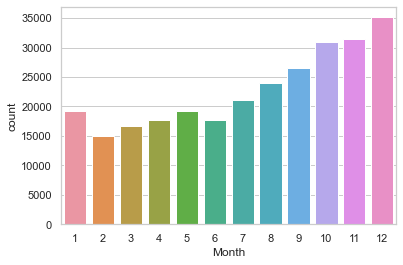

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Month", data=YellowCab)

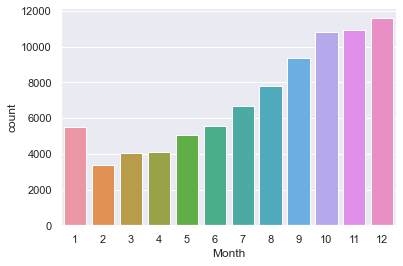

In [61]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Month", data=PinkCab)

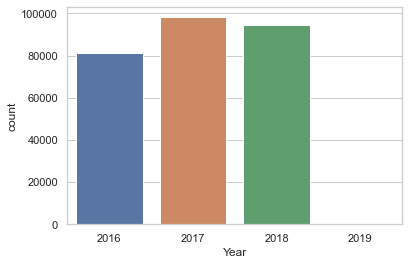

In [62]:
sns.set_style("whitegrid")
ax4 = sns.countplot(x="Year", data=YellowCab)

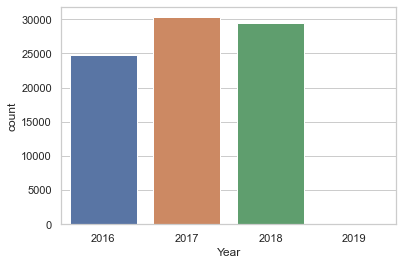

In [63]:
sns.set_style("whitegrid")
ax3 = sns.countplot(x="Year", data= PinkCab)

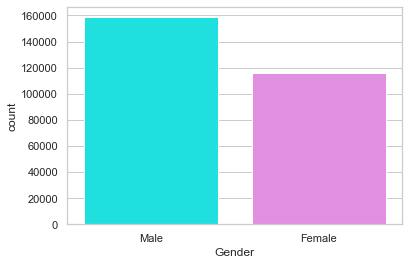

In [64]:
# sns.set_theme(style="darkgrid")
YellowGender = sns.countplot(x="Gender", palette=['Cyan', 'Violet'], data=YellowCab)

In [65]:
sns.set_theme(style="darkgrid")
# PinkGender = sns.countplot(x="Gender", palette=['Cyan', 'Violet'], data= PinkCab)
one_time_ust = sns.countplot(x="Customer ID", palette=['Cyan', 'Violet'], data= one_time_cust)

Error in callback <function flush_figures at 0x7f84c046bdc0> (for post_execute):


KeyboardInterrupt: 

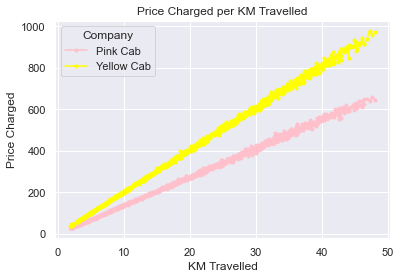

In [66]:
yearsales=pd.pivot_table(final_df,index='KM Travelled',columns='Company' ,values='Price Charged')
yearsales.plot(marker='.', color=['pink', 'yellow'])
plt.ylabel('Price Charged')
plt.title('Price Charged per KM Travelled')
plt.show()



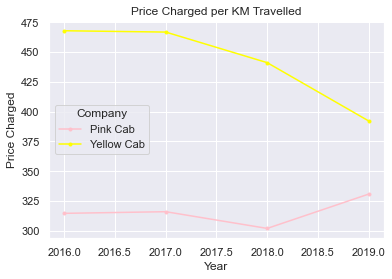

In [67]:
yearsales=pd.pivot_table(final_df,index='Year',columns='Company' ,values='Price Charged' )
yearsales.plot(marker='.', color=['pink', 'yellow'])
plt.ylabel('Price Charged')
plt.title('Price Charged per KM Travelled')
plt.show()

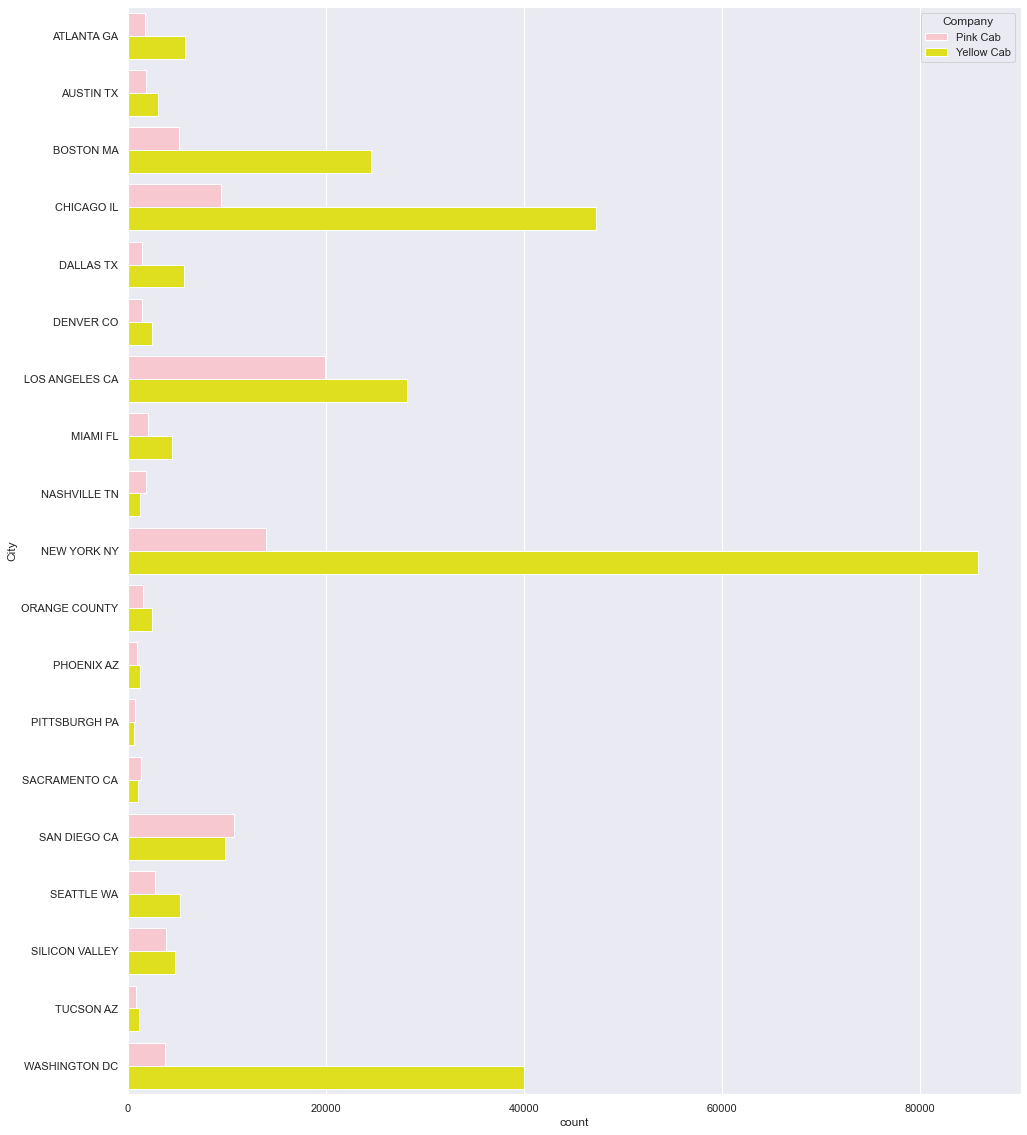

In [68]:
f, ax = plt.subplots(figsize=(16, 20))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Company', palette=['Pink', 'Yellow'], data=final_df)
plt.show()
# sns.set_style("whitegrid")
# sns.countplot(x="Company", data=full_cab_data, palette=["#d40404","#ffdd00"])

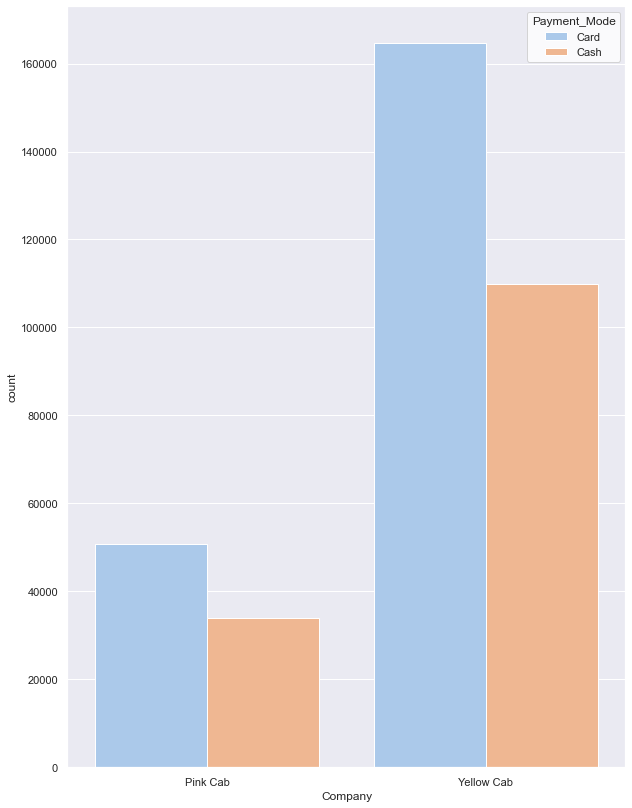

In [69]:
f, ax = plt.subplots(figsize=(10, 14))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Payment_Mode', palette='pastel', data=final_df)
plt.show()

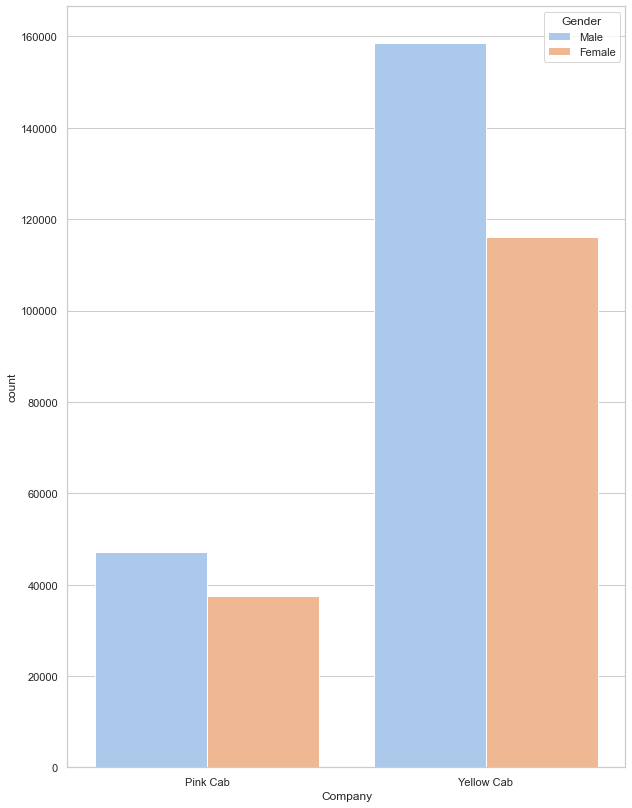

In [70]:
f, ax = plt.subplots(figsize=(10, 14))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Gender', palette='pastel', data=final_df)
plt.show()

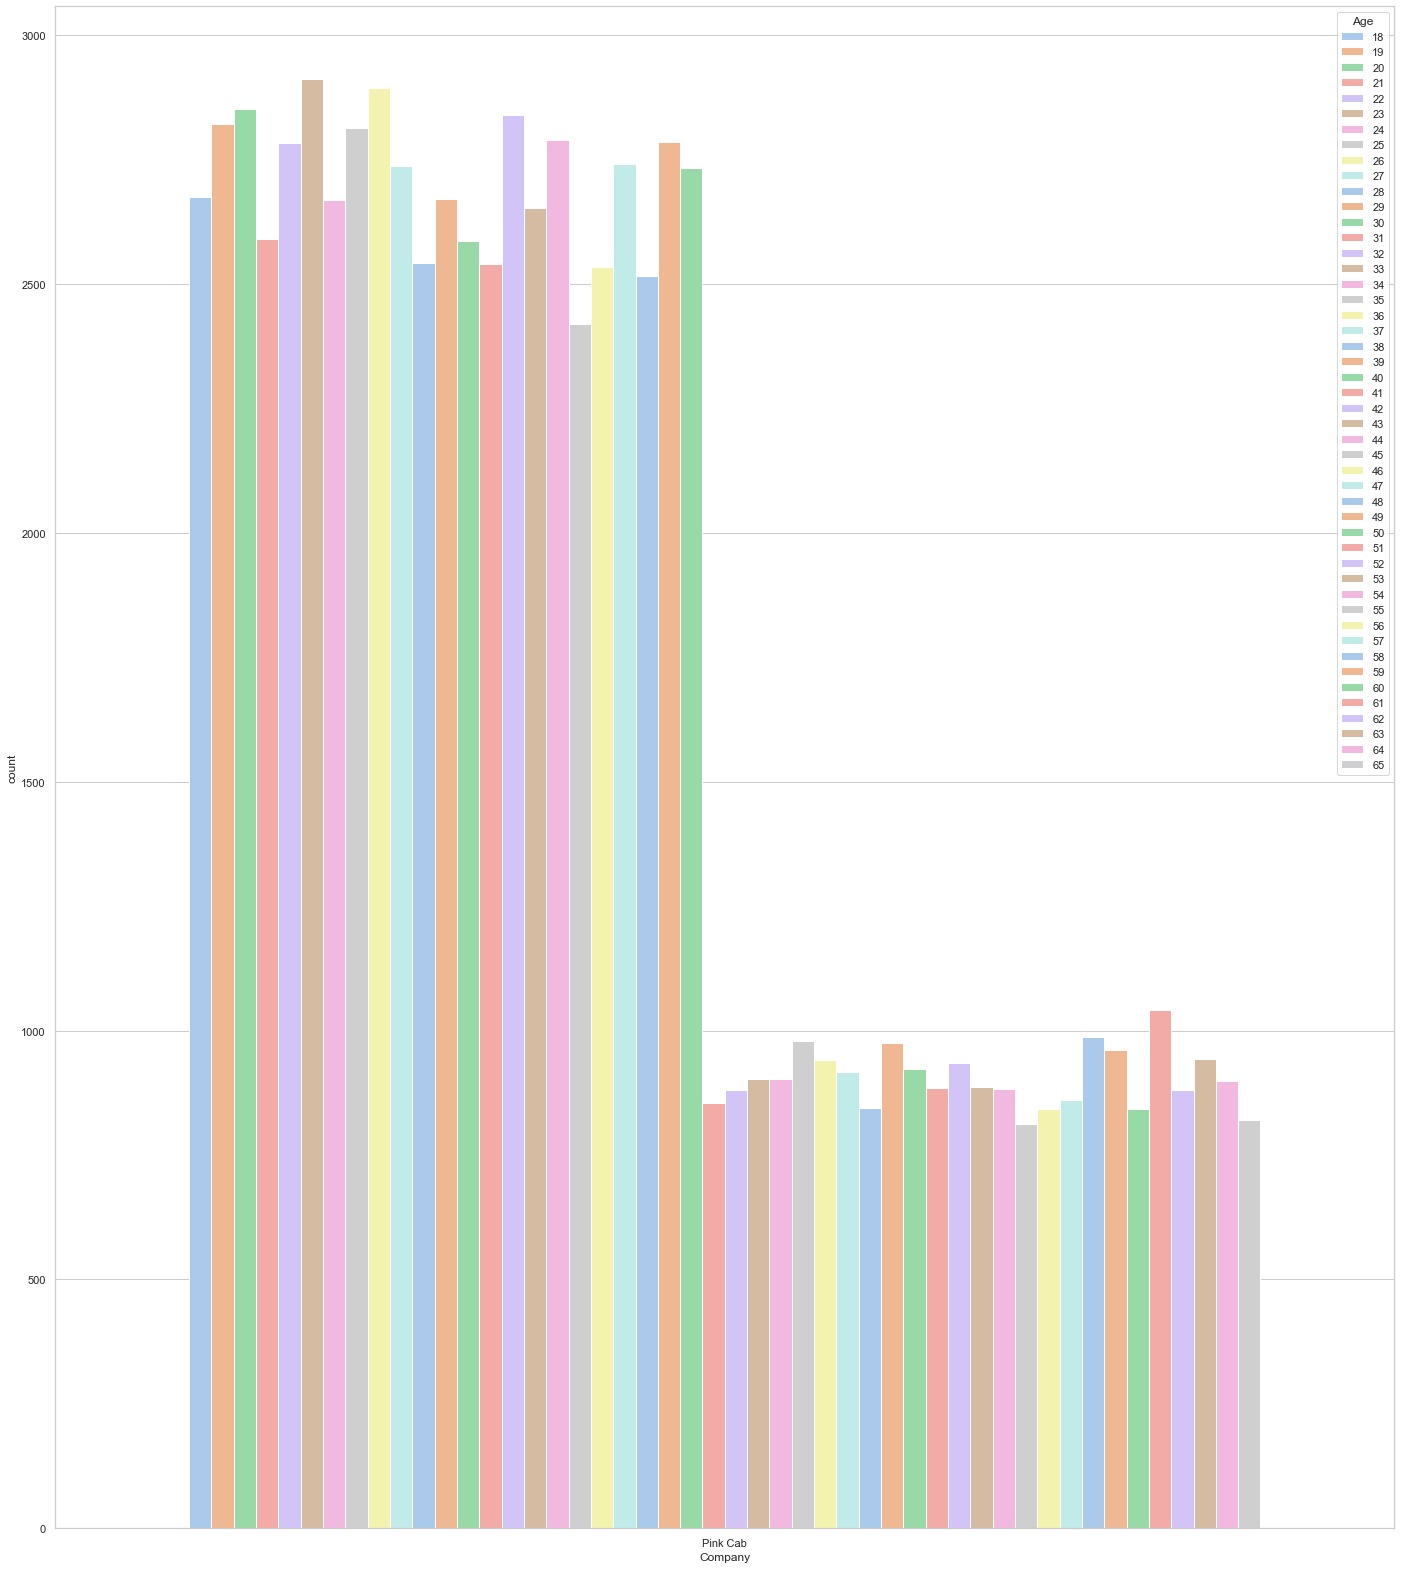

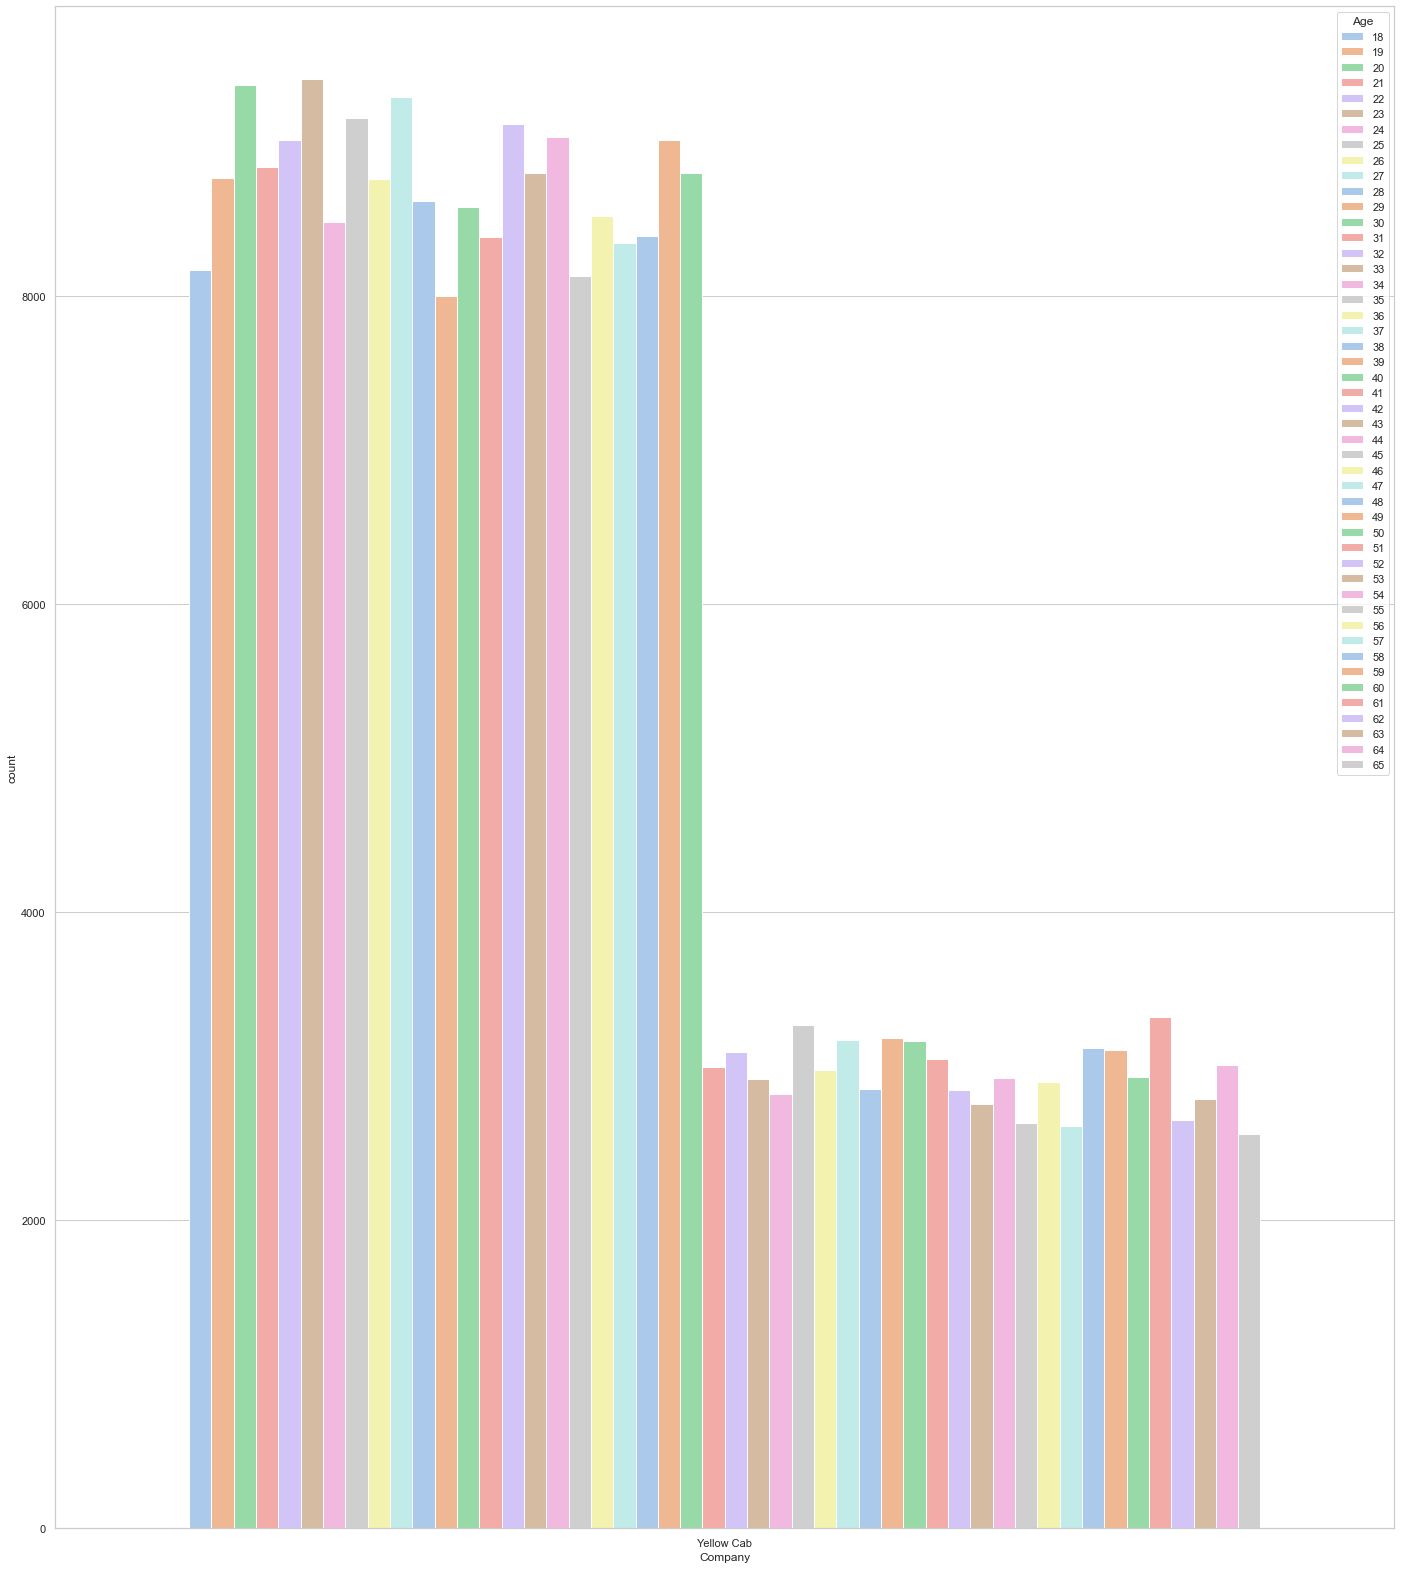

In [71]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Age', palette='pastel', data=PinkCab)
plt.show()
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Age', palette='pastel', data=YellowCab)
plt.show()

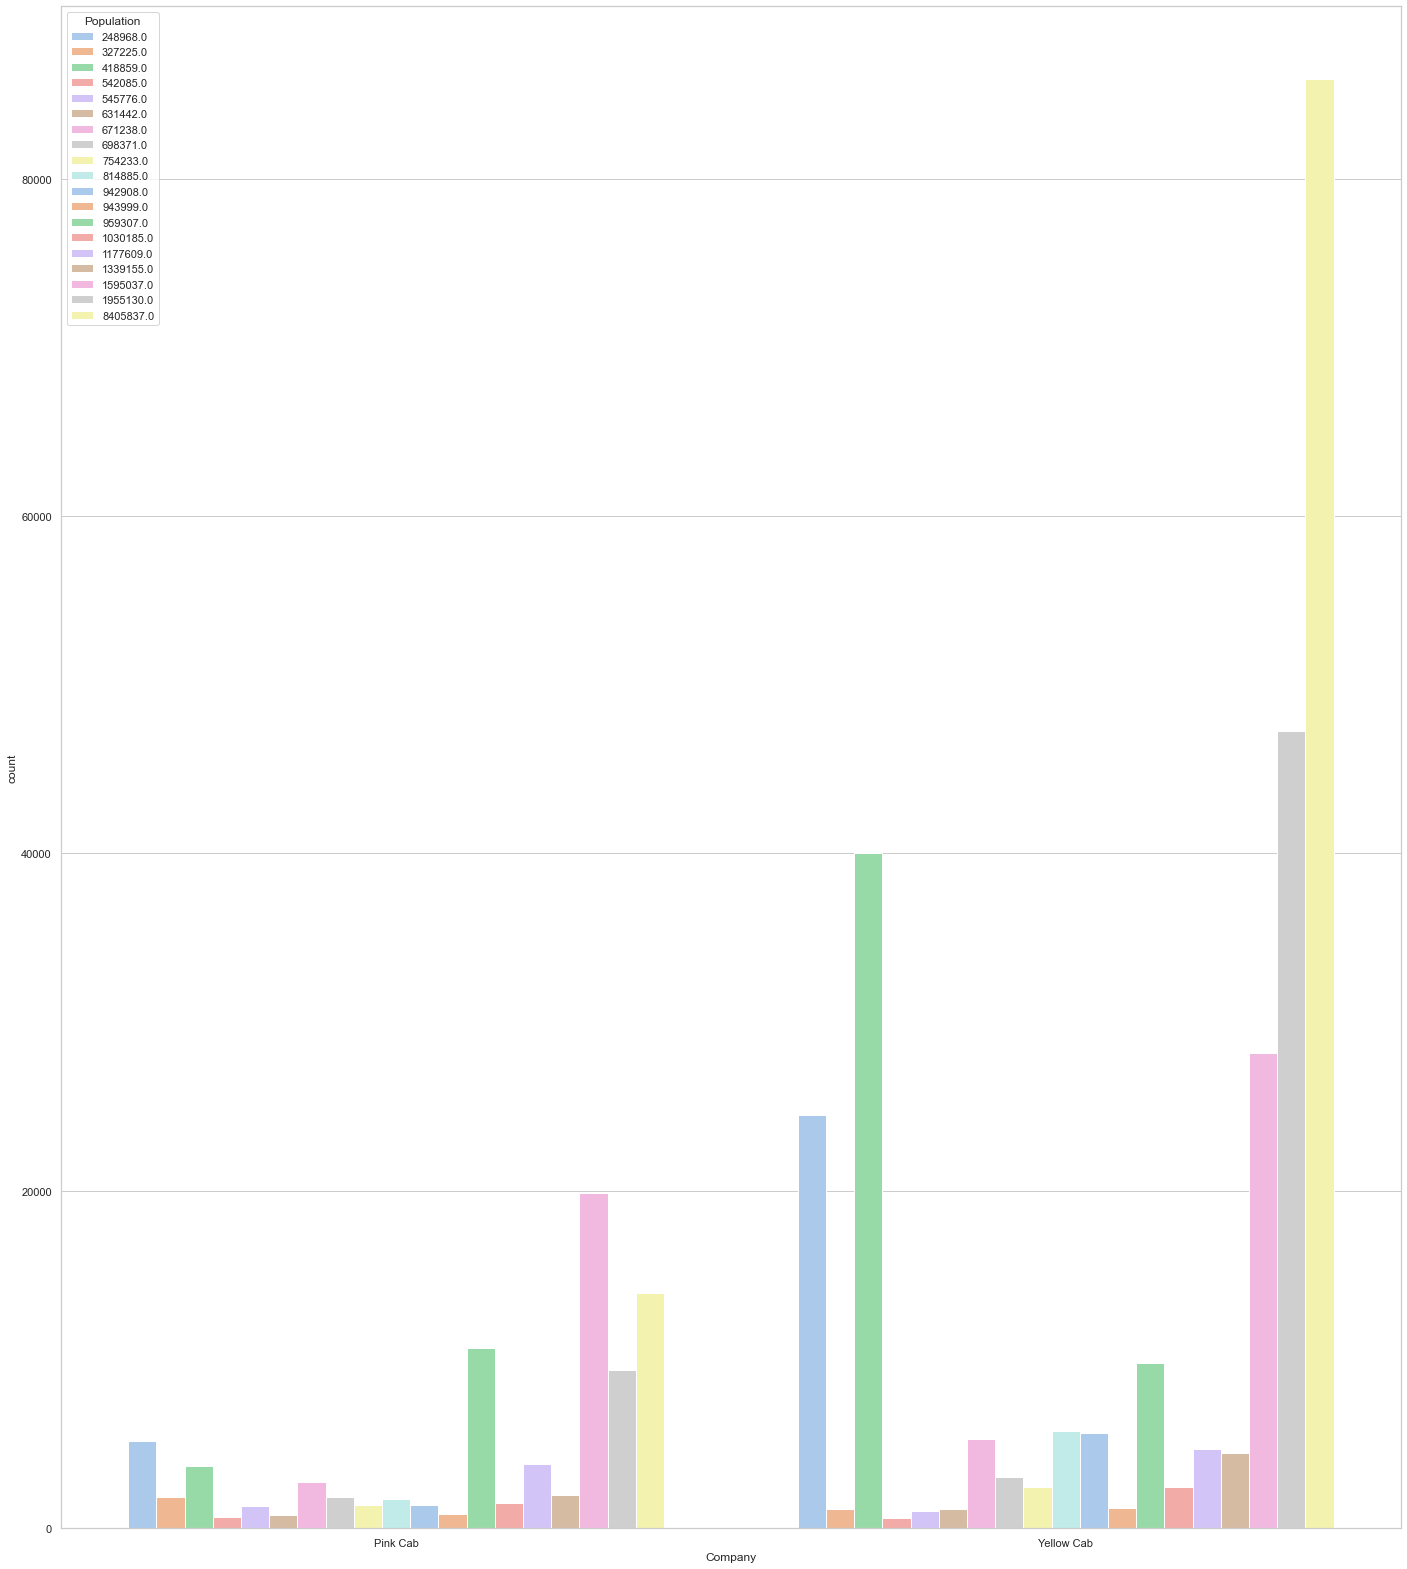

In [72]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Population', palette='pastel', data=final_df)
plt.show()

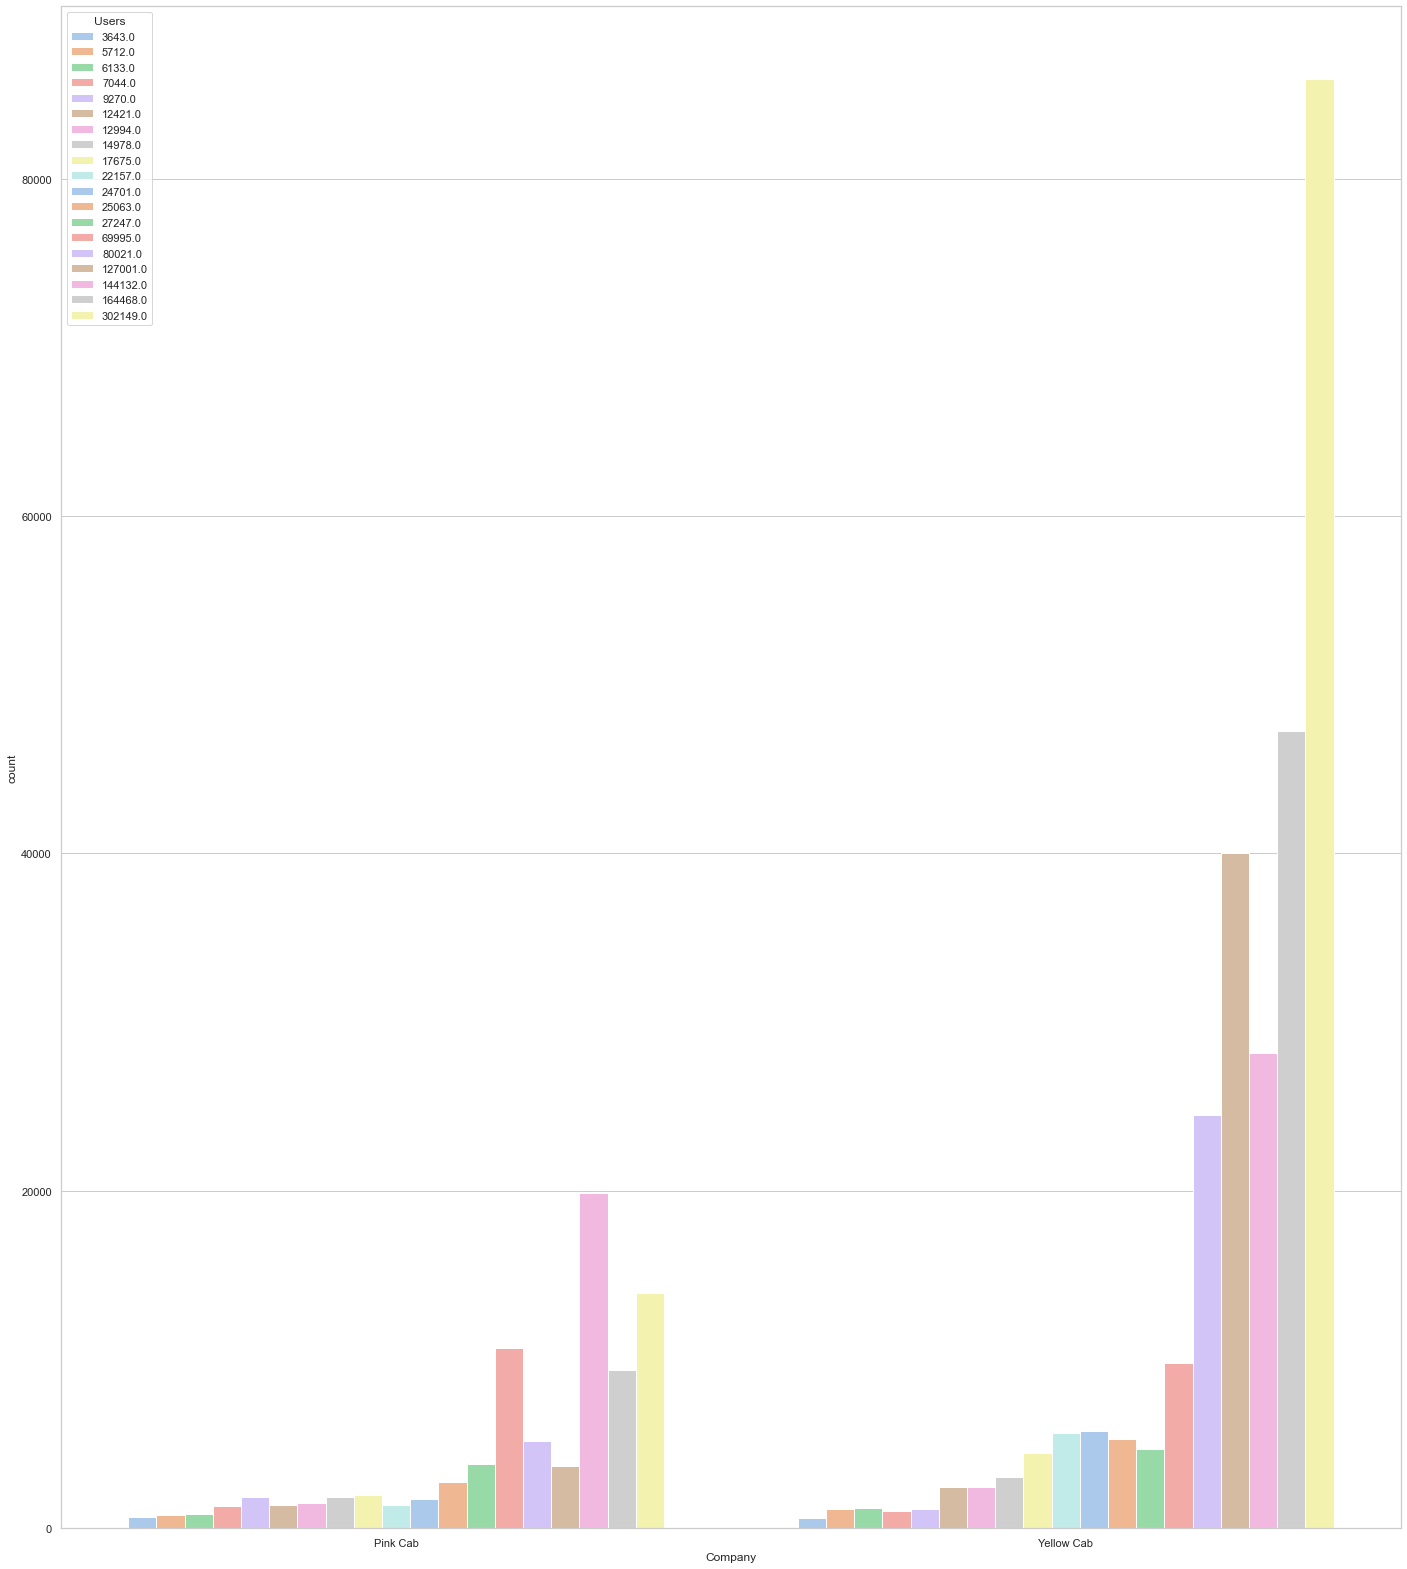

In [73]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Users', palette='pastel', data=final_df)
plt.show()

In [74]:
final_df['Population'] = (
    final_df['Population'].str.replace(',', '', regex=True).astype(float)
)

AttributeError: Can only use .str accessor with string values!

In [ ]:
final_df['Population'] = (
    final_df['Population'].str.replace(',', '', regex=True).astype(float)
)
final_df['Users'] = (
    final_df['Users'].str.replace(',', '', regex=True).astype(float)
)

In [ ]:
yearsales=pd.pivot_table(final_df,index='Users',columns='Company' ,values='Population')
yearsales.plot(marker='.', figsize=(24,28))
plt.ylabel('Users')
plt.title('Users per Population')
plt.show()

In [ ]:
YellowCab['Population'] = (
    YellowCab['Population'].str.replace(',', '', regex=True).astype(float)
)
yearsales=pd.pivot_table(YellowCab,index='Users' ,values='Population')
yearsales.plot(marker='.', figsize=(24,28))
plt.ylabel('Users')
plt.title('Users per Population')
plt.show()

In [ ]:
PinkCab['Population'] = (
    PinkCab['Population'].str.replace(',', '', regex=True).astype(float)
)
yearsales=pd.pivot_table(PinkCab,index='Users' ,values='Population')
yearsales.plot(marker='.', figsize=(24,28))
plt.ylabel('Users')
plt.title('Users per Population')
plt.show()